<a href="https://colab.research.google.com/github/niteshkumar2000/Forward-Backward-Selection/blob/master/DataScienceAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward-Backward-Selection with Early Dropping

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

## Preprocessing wine dataset

In [11]:
from sklearn.datasets import load_wine
data = load_wine()

In [12]:
x = pd.DataFrame(data.data)
x.columns = data.feature_names
y = pd.DataFrame(data.target)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
print(x.head())
print(x_train.shape, x_test.shape)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

# Implementation of FBS algorithm

## Performing Forward Selection

In [18]:
forwardres = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 7,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    7.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    7.6s finished

[2020-04-13 10:30:57] Features: 1/7 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.8s finished

[2020-04-13 10:31:03] Features: 2/7 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    6.1s finished

[2020-04-13 10:31:09] Features: 3/7 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.6s finished

[2020-04-13 10:31:15] Features: 4/7 -- score: 0.978968

## Performing Backward Selection

In [19]:
backwardres = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 7,
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(x_train.values, np.ravel(y_train))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    7.0s finished

[2020-04-13 10:31:37] Features: 12/7 -- score: 0.9861111111111112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.4s finished

[2020-04-13 10:31:42] Features: 11/7 -- score: 0.9861111111111112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    5.3s finished

[2020-04-13 10:31:48] Features: 10/7 -- score: 0.9791666666666666[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.1s finished

[2020-04-13 10:31:53] Features: 9/7 -- score: 0.986

> NOTE: **RandomForestClassifier** is used for data Classification

## FBS Results and Score

In [22]:
print(forwardres.k_feature_names_)
print(forwardres.k_score_)
print(backwardres.k_feature_names_)
print(backwardres.k_score_)

('alcohol', 'ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'color_intensity', 'proline')
0.9791666666666666
('0', '1', '2', '3', '4', '6', '9')
0.978968253968254


# Implementation of FBED (with early dropping)

In [23]:
import copy
data1 = copy.deepcopy(x_train)
data2 = copy.deepcopy(x_train)
for i in range(1,6):
  #change iteration as needed
  forwwithearly = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = i,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(data1, y_train)
  print(forwwithearly.k_feature_names_)
  for j in range(i):
    if forwwithearly.k_feature_names_[j] in data2.columns:
      del data2[forwwithearly.k_feature_names_[j]]
  print(data2)
  print(data1)
  columncorr = set() 
  corrmatrix = data2.corr()
  for i in range(len(corrmatrix.columns)):
      for j in range(i):
        if (corrmatrix.iloc[i, j] >= 0.70) and (corrmatrix.columns[j] not in columncorr):
            colname = corrmatrix.columns[i]
            columncorr.add(colname)
            if colname in data2.columns:
                del data2[colname] 
                del data1[colname]

  print(columncorr)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    7.2s finished

[2020-04-13 10:32:09] Features: 1/1 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


('flavanoids',)
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
161    13.69        3.26  2.54               20.0      107.0           1.83   
92     12.69        1.53  2.26               20.7       80.0           1.38   
94     11.62        1.99  2.28               18.0       98.0           3.02   
174    13.40        3.91  2.48               23.0      102.0           1.80   
24     13.50        1.81  2.61               20.0       96.0           2.53   
..       ...         ...   ...                ...        ...            ...   
103    11.82        1.72  1.88               19.5       86.0           2.50   
67     12.37        1.17  1.92               19.6       78.0           2.11   
117    12.42        1.61  2.19               22.5      108.0           2.00   
47     13.90        1.68  2.12               16.0      101.0           3.10   
172    14.16        2.51  2.48               20.0       91.0           1.68   

     nonflavanoid_phenols  proantho

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.2s finished

[2020-04-13 10:32:15] Features: 1/2 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    5.5s finished

[2020-04-13 10:32:21] Features: 2/2 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


('flavanoids', 'color_intensity')
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
161    13.69        3.26  2.54               20.0      107.0           1.83   
92     12.69        1.53  2.26               20.7       80.0           1.38   
94     11.62        1.99  2.28               18.0       98.0           3.02   
174    13.40        3.91  2.48               23.0      102.0           1.80   
24     13.50        1.81  2.61               20.0       96.0           2.53   
..       ...         ...   ...                ...        ...            ...   
103    11.82        1.72  1.88               19.5       86.0           2.50   
67     12.37        1.17  1.92               19.6       78.0           2.11   
117    12.42        1.61  2.19               22.5      108.0           2.00   
47     13.90        1.68  2.12               16.0      101.0           3.10   
172    14.16        2.51  2.48               20.0       91.0           1.68   

     nonflavanoid

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.2s finished

[2020-04-13 10:32:27] Features: 1/3 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    5.6s finished

[2020-04-13 10:32:33] Features: 2/3 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.6s finished

[2020-04-13 10:32:39] Features: 3/3 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


('magnesium', 'flavanoids', 'color_intensity')
     alcohol  malic_acid   ash  alcalinity_of_ash  total_phenols  \
161    13.69        3.26  2.54               20.0           1.83   
92     12.69        1.53  2.26               20.7           1.38   
94     11.62        1.99  2.28               18.0           3.02   
174    13.40        3.91  2.48               23.0           1.80   
24     13.50        1.81  2.61               20.0           2.53   
..       ...         ...   ...                ...            ...   
103    11.82        1.72  1.88               19.5           2.50   
67     12.37        1.17  1.92               19.6           2.11   
117    12.42        1.61  2.19               22.5           2.00   
47     13.90        1.68  2.12               16.0           3.10   
172    14.16        2.51  2.48               20.0           1.68   

     nonflavanoid_phenols  proanthocyanins   hue  proline  
161                  0.50             0.80  0.96    680.0  
92              

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.7s finished

[2020-04-13 10:32:45] Features: 1/4 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    5.8s finished

[2020-04-13 10:32:51] Features: 2/4 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.5s finished

[2020-04-13 10:32:56] Features: 3/4 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    3.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    5.4s finished

[2020-04-13 10:33:02] Features: 4/4 -- score: 0.9789682539682539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent

('magnesium', 'flavanoids', 'color_intensity', 'proline')
     alcohol  malic_acid   ash  alcalinity_of_ash  total_phenols  \
161    13.69        3.26  2.54               20.0           1.83   
92     12.69        1.53  2.26               20.7           1.38   
94     11.62        1.99  2.28               18.0           3.02   
174    13.40        3.91  2.48               23.0           1.80   
24     13.50        1.81  2.61               20.0           2.53   
..       ...         ...   ...                ...            ...   
103    11.82        1.72  1.88               19.5           2.50   
67     12.37        1.17  1.92               19.6           2.11   
117    12.42        1.61  2.19               22.5           2.00   
47     13.90        1.68  2.12               16.0           3.10   
172    14.16        2.51  2.48               20.0           1.68   

     nonflavanoid_phenols  proanthocyanins   hue  
161                  0.50             0.80  0.96  
92                   0.

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.8s finished

[2020-04-13 10:33:08] Features: 1/5 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    5.6s finished

[2020-04-13 10:33:13] Features: 2/5 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.6s finished

[2020-04-13 10:33:19] Features: 3/5 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    3.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    5.3s finished

[2020-04-13 10:33:24] Features: 4/5 -- score: 0.9789682539682539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent

('ash', 'magnesium', 'flavanoids', 'color_intensity', 'proline')
     alcohol  malic_acid  alcalinity_of_ash  total_phenols  \
161    13.69        3.26               20.0           1.83   
92     12.69        1.53               20.7           1.38   
94     11.62        1.99               18.0           3.02   
174    13.40        3.91               23.0           1.80   
24     13.50        1.81               20.0           2.53   
..       ...         ...                ...            ...   
103    11.82        1.72               19.5           2.50   
67     12.37        1.17               19.6           2.11   
117    12.42        1.61               22.5           2.00   
47     13.90        1.68               16.0           3.10   
172    14.16        2.51               20.0           1.68   

     nonflavanoid_phenols  proanthocyanins   hue  
161                  0.50             0.80  0.96  
92                   0.58             1.62  0.96  
94                   0.17            

[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    3.8s finished

[2020-04-13 10:33:28] Features: 5/5 -- score: 0.9720238095238095

## FBED Results and Score

In [24]:
print(forwwithearly.k_feature_names_)

('ash', 'magnesium', 'flavanoids', 'color_intensity', 'proline')


In [25]:
print(forwwithearly.k_score_)

0.9720238095238095


In [26]:
selectedforback = copy.deepcopy(pd.DataFrame(x_train, columns=forwwithearly.k_feature_names_))

In [27]:
print(selectedforback)

      ash  magnesium  flavanoids  color_intensity  proline
161  2.54      107.0        0.56             5.88    680.0
92   2.26       80.0        1.46             3.05    495.0
94   2.28       98.0        2.26             3.25    345.0
174  2.48      102.0        0.75             7.30    750.0
24   2.61       96.0        2.61             3.52    845.0
..    ...        ...         ...              ...      ...
103  1.88       86.0        1.64             2.06    415.0
67   1.92       78.0        2.00             4.68    510.0
117  2.19      108.0        2.09             2.06    345.0
47   2.12      101.0        3.39             6.10    985.0
172  2.48       91.0        0.70             9.70    660.0

[142 rows x 5 columns]


In [28]:
Finalres = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 4,
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(selectedforback.values, np.ravel(y_train))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished

[2020-04-13 10:33:34] Features: 4/4 -- score: 0.9718253968253968

In [29]:
print(Finalres.k_feature_idx_)

(0, 1, 2, 3)


> which are ('ash', 'magnesium', 'flavanoids', 'color_intensity')

In [30]:
print(Finalres.k_score_)

0.9718253968253968


> Thus forward-Backward selection with early dropping is done by finding the independent variables and eliminating it which increases run time

> Early dropping is done by finding the correlation matrix after performing each iteration of Forward Selection

In [31]:
print(x_train)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
161    13.69        3.26  2.54               20.0      107.0           1.83   
92     12.69        1.53  2.26               20.7       80.0           1.38   
94     11.62        1.99  2.28               18.0       98.0           3.02   
174    13.40        3.91  2.48               23.0      102.0           1.80   
24     13.50        1.81  2.61               20.0       96.0           2.53   
..       ...         ...   ...                ...        ...            ...   
103    11.82        1.72  1.88               19.5       86.0           2.50   
67     12.37        1.17  1.92               19.6       78.0           2.11   
117    12.42        1.61  2.19               22.5      108.0           2.00   
47     13.90        1.68  2.12               16.0      101.0           3.10   
172    14.16        2.51  2.48               20.0       91.0           1.68   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [32]:
cordata = copy.deepcopy(x_train)

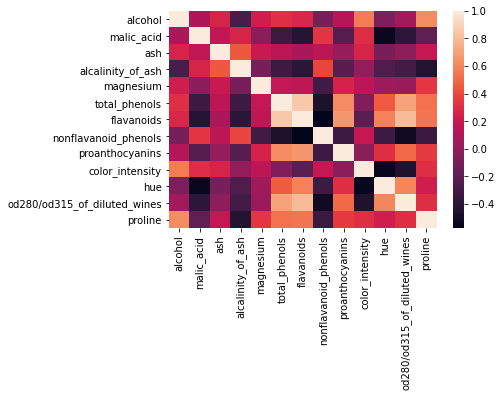

In [36]:
import seaborn as sea
sea.heatmap(cordata.corr())

In [37]:
cordata.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

> Early Dropping helps in decreasing the time consumption of the model

> Also the method  Exhaustive Feature Selection helps in attaining best scores with best attributes but time consuming

In [35]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

exhaustive = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         min_features= 4,
          max_features= 5,
          scoring='accuracy',
          cv = None,
          n_jobs=-1
         ).fit(x_train, y_train)

Regards,
17PW14, 17PW24, 17PW38